## Data

The data set is in a 7 × 10 × 30 array for the 7 geographical regions, 10 age groups, and 30 samples per group. The cell below loads the data and plots the average number of GP visits for each group. You need to use all the data (not just the averages) but the averages should help to give you an idea of what the data set looks like.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


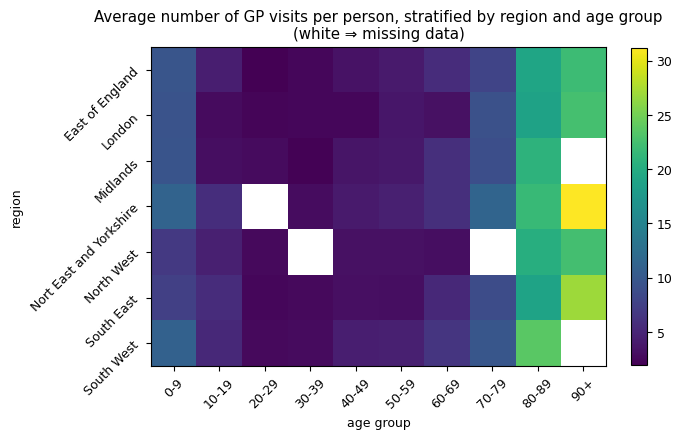

In [1]:
import numpy as np
from numpy import nan  # not-a-number, used to indicated missing data
import matplotlib.pyplot as plt

regions = ['East of England', 'London', 'Midlands', 'Nort East and Yorkshire', 'North West', 'South East', 'South West']
ages = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
sample_size = 30

raw_data = np.array([
    [[4,11,14,13,12,8,0,8,14,21,17,7,3,9,2,7,23,2,5,12,15,0,14,2,17,7,17,13,11,3],[4,4,10,2,24,1,10,0,0,5,1,3,3,3,0,9,5,0,4,14,3,0,9,1,6,1,5,2,0,4],[0,0,0,1,0,2,1,3,4,4,6,0,1,4,2,2,2,1,4,0,6,2,0,6,0,0,2,1,1,3],[5,0,3,5,3,3,2,3,3,3,3,4,3,7,2,1,0,1,0,2,3,1,5,0,1,1,4,2,4,0],[0,5,6,0,0,0,5,6,0,6,2,3,4,0,0,1,2,7,6,5,6,11,0,7,2,2,4,4,7,0],[9,4,0,5,0,9,2,0,6,1,7,4,10,11,1,0,6,0,14,6,6,2,0,0,0,3,5,3,2,7],[4,2,3,0,20,0,8,5,0,3,8,4,8,8,4,4,6,8,1,11,4,3,6,0,6,2,8,4,21,7],[12,5,5,4,11,17,7,13,0,11,6,0,9,0,0,10,15,3,7,11,9,23,20,0,0,3,27,0,7,4],[22,38,0,10,27,21,0,39,23,11,28,20,12,10,16,0,19,0,29,29,11,47,0,19,29,13,14,23,31,34],[26,75,29,25,43,34,15,10,41,27,0,21,28,8,24,29,0,0,47,0,44,0,20,0,48,0,0,0,30,35]],
    [[6,18,6,5,14,0,7,10,4,12,15,9,2,30,12,0,9,0,14,23,6,5,0,2,11,8,25,0,30,0],[2,0,5,0,13,1,3,0,8,1,0,0,2,6,2,1,0,9,0,0,2,0,6,0,9,2,7,3,2,1],[3,1,0,3,5,2,3,3,7,4,0,2,2,6,1,3,0,4,4,2,2,0,2,2,0,4,2,0,2,1],[2,6,0,1,3,0,2,1,3,0,3,5,0,2,0,1,0,3,4,6,5,7,0,4,0,8,1,3,2,0],[5,0,0,0,9,0,0,2,2,4,1,9,5,1,1,0,0,4,2,4,3,6,0,4,6,0,0,2,5,0],[6,0,7,6,0,7,1,3,2,0,2,4,2,0,4,7,2,1,7,2,7,4,9,1,0,8,5,3,4,7],[9,8,3,5,1,7,4,4,0,6,1,0,0,6,2,0,0,0,7,5,0,10,0,6,0,6,5,2,0,2],[0,0,0,10,7,13,10,0,24,20,6,14,0,2,1,10,20,20,11,9,9,0,7,6,9,16,7,18,24,4],[19,28,38,30,19,25,46,6,13,0,21,9,13,14,13,0,21,40,6,25,8,22,15,28,0,17,14,35,25,13],[30,46,16,0,48,0,14,0,0,0,20,0,16,23,29,30,15,26,40,22,29,61,37,28,50,12,21,9,15,41]],
    [[12,7,0,0,17,9,19,13,9,8,8,8,9,0,21,9,26,0,0,15,0,6,19,0,0,12,9,21,16,12],[2,2,4,0,4,6,7,0,7,0,5,0,0,9,6,2,0,0,4,4,2,6,3,0,0,8,0,7,3,0],[1,0,5,4,2,0,2,5,5,1,3,4,0,14,1,1,0,2,5,2,0,3,5,7,3,0,0,5,1,3],[0,4,2,2,3,0,0,2,4,0,0,1,1,3,0,5,7,0,3,0,2,1,2,2,0,9,4,0,2,5],[3,0,0,3,8,2,5,0,8,3,3,8,2,3,3,0,17,11,5,9,1,2,2,1,1,2,0,0,0,5],[4,5,9,9,3,10,0,8,3,0,2,5,2,0,4,4,1,0,6,15,0,5,5,0,0,2,9,2,0,0],[0,5,8,10,1,0,0,0,1,3,4,8,3,6,5,13,5,13,10,7,20,26,7,0,0,5,11,0,1,3],[14,5,5,0,11,13,9,22,0,8,10,20,0,0,8,5,8,16,11,0,17,0,8,1,7,33,3,15,0,20],[25,30,31,52,0,39,16,20,20,22,12,0,19,24,0,10,29,28,24,0,29,0,20,0,49,37,20,48,0,23],[nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan]],
    [[0,21,14,4,0,17,13,0,14,0,15,32,15,6,0,14,0,17,24,10,16,9,19,9,10,9,17,13,0,19],[12,5,7,2,4,1,0,7,8,11,1,3,6,3,11,0,4,5,4,7,22,7,0,2,0,2,17,8,8,6],[nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan],[2,2,2,1,4,5,4,3,2,1,2,1,2,2,5,2,2,6,5,3,3,6,1,0,4,0,2,5,4,5],[6,0,2,10,7,0,8,14,3,0,3,3,8,9,2,7,0,4,0,5,5,2,2,3,4,10,0,0,5,0],[6,4,0,4,5,9,1,4,5,6,9,0,3,1,5,14,0,6,6,10,7,8,2,0,4,0,3,12,0,0],[1,12,2,2,4,10,13,0,4,9,12,8,5,5,3,2,2,5,6,7,6,2,7,6,1,14,8,6,8,8],[15,0,18,19,12,0,11,10,33,18,10,6,16,7,8,15,17,12,13,8,5,22,16,8,19,6,0,18,0,0],[62,0,0,29,22,0,39,23,28,0,21,30,18,0,47,0,15,0,16,0,27,0,30,28,45,58,18,48,30,15],[41,31,40,16,37,63,63,0,44,28,29,39,22,18,39,59,13,31,0,49,53,27,33,0,46,64,24,0,0,27]],
    [[0,8,0,12,14,3,4,9,0,0,5,0,30,5,0,1,21,8,0,5,0,11,17,3,13,3,18,13,0,0],[6,5,1,0,0,0,12,7,4,7,0,8,0,7,4,4,0,2,12,7,3,8,4,4,5,8,2,10,0,5],[3,4,4,3,4,2,0,9,2,0,4,6,4,2,6,0,2,0,0,0,3,0,2,2,7,2,0,1,1,6],[nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan],[3,11,3,5,4,4,7,0,0,4,1,0,0,5,0,2,10,4,5,0,5,7,4,6,1,0,0,3,1,4],[0,4,4,3,0,0,4,6,4,7,2,0,0,5,5,0,8,0,8,5,0,4,0,0,5,15,7,2,0,1],[0,5,12,5,4,5,5,4,8,1,4,0,0,4,0,3,6,0,0,0,0,0,1,0,12,0,8,0,1,3],[nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan],[41,7,2,31,20,14,26,29,8,0,25,20,21,30,18,0,10,0,32,18,6,33,43,13,31,24,22,39,44,0],[29,0,20,29,26,40,29,0,42,19,8,32,29,22,30,24,29,35,0,46,39,35,19,13,9,5,14,18,0,34]],
    [[6,16,0,10,9,4,24,6,0,10,7,5,5,11,11,12,0,0,0,8,14,5,0,8,7,0,26,0,0,20],[7,0,8,2,3,13,11,5,7,7,0,0,4,0,3,15,3,8,8,5,12,1,4,14,11,4,6,0,5,3],[6,4,2,4,4,0,1,3,2,3,2,1,6,0,2,1,2,0,2,2,2,2,2,5,0,3,2,2,6,2],[0,4,4,0,1,4,2,3,4,2,4,5,0,4,0,0,3,0,0,1,1,4,7,4,2,4,6,3,3,4],[4,3,3,0,5,2,1,3,7,5,0,0,0,1,4,3,4,1,6,0,6,9,0,5,6,0,6,0,5,4],[6,1,3,4,6,0,0,7,5,2,0,7,0,2,0,5,0,5,2,0,0,3,8,6,2,5,1,5,2,3],[10,3,1,9,12,9,1,0,6,0,1,0,5,4,2,0,9,0,1,3,0,5,22,6,14,11,9,6,5,4],[9,0,7,12,9,14,13,14,12,13,0,10,8,5,5,8,8,0,28,0,0,23,0,0,14,7,17,0,8,17],[7,62,0,0,16,0,0,30,18,22,12,0,24,0,13,0,0,7,9,0,67,29,49,34,31,40,26,25,25,21],[28,39,0,33,32,23,0,20,36,16,20,0,24,60,17,28,48,84,16,57,29,35,14,0,0,67,25,19,37,0]],
    [[14,0,34,16,0,4,8,22,11,0,13,17,18,14,35,9,10,9,13,10,12,7,6,20,11,12,0,0,7,0],[5,12,0,10,8,0,7,0,6,0,20,0,10,0,3,6,9,8,7,0,3,7,10,5,7,5,3,0,8,0],[9,3,3,0,2,0,4,8,5,1,0,4,3,3,3,0,0,1,5,2,2,12,0,1,4,2,1,0,2,0],[3,0,5,0,0,1,1,3,1,1,1,3,4,4,4,8,5,0,0,12,0,1,0,4,4,5,1,9,3,1],[8,2,11,0,8,0,0,5,7,4,10,0,13,2,0,0,0,5,3,0,8,4,7,2,3,5,3,8,3,11],[5,2,5,4,10,2,10,4,14,3,3,2,2,13,8,2,3,9,0,0,6,2,5,6,0,0,3,2,7,4],[0,6,3,8,0,5,3,10,5,8,17,13,0,8,2,6,6,2,5,10,8,6,10,0,7,5,4,8,9,20],[20,16,16,20,11,3,13,1,0,0,0,3,5,9,0,21,10,13,8,22,19,7,19,21,4,0,2,10,0,19],[12,0,33,20,36,35,16,26,12,51,0,37,0,15,41,35,37,30,11,32,33,18,45,22,19,0,43,19,14,19],[nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan]]])

plt.rcParams.update({'font.size': 9})

plt.figure()
plt.title('Average number of GP visits per person, stratified by region and age group\n(white ⇒ missing data)')
plt.xlabel('age group')
plt.ylabel('region')
plt.imshow(raw_data.mean(axis=2))
plt.colorbar(fraction=0.032)
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()

To make the data easier to work with in PyMC, you should reorganize it into 3 arrays — the region index (an integer indicating which geographical region each count is from), the age index (an integer for each age category), and the counts of the number of visits. You should leave out the missing (NaN) values since PyMC can't use those as observed values.

## Model

We will use a Zero-Inflated Poisson likelihood function for this data set. The motivation for making it zero-inflated is that there are many more 0s in the data set than we would expect from a Poisson distribution since a lot of people never visit the doctor. This might be because they don't like doctors, don't take their health seriously, procrastinate, etc. We suspect that those people who do sometimes visit a doctor, follow a Poisson distribution for the number of appointments in a year.

## Required tasks

* Come up with a strategy for estimating the values of the missing groups. How can you use the group values you have to estimate/predict the values of the groups you don’t have? Describe your strategy.

* Pre-process the data to make it easier to work with in PyMC by creating a region index array, age index array, and count array.

* Implement two Zero-Inflated Poisson models to produce the predictions for the missing groups.

  * Complete pooling. Assume the counts are generated i.i.d. from a Zero-Inflated Poisson distribution with unknown rate and zero-probability parameters. Compute the posterior distribution over these parameters and make predictions using this posterior distribution.

  * Partial pooling. Assume a hierarchical/multi-level model where each group has a Zero-Inflated Poisson distribution with its own parameters but the parameters come from a common prior with unknown parameters. Choose the prior appropriately. Compute the posterior distribution over all the rate parameters and the parameters of your chosen prior and make predictions using this posterior distribution.

    To simplify this somewhat, assume that the zero-probability parameter is the same for all groups but that the rate parameter depends on the group.

* Explain or demonstrate how you came up with your prior distributions for the two models.

* Show the predictions of the values of each missing group. Explain the differences between the predictions of the complete pooling and partial pooling models. You will find that one model is more confident (has less variance in its predictions) than the other model. Explain which model we should prefer.

##  Strategy

The raw data represents the number of GP visits by region and age group in England. There are 7 regions represented and 10 age groups. There are 5 blank spots in the visualization, and my work aims to use statistical tool to estimate the missing values in the data set. 

Poisson distribution is usually used for modeling the counts since it represents the interarrival rate of the exponential distribution. However, due to the nature of the data, we have zero - inflation; thus, the number of zeroes in a data set is larger than we expect according to a typical Poisson model. The reason for this is that many people never visit a doctor (count = 0), which might bias the model. We address this issue by introducing a zero-inflated poisson model to separate the counting of visits for people who do not visit doctors and the counting of visits for people who do visit doctors.

Our model will be composted of the 2 main components: \
**Poisson component**: it models the count data (number of GP visits) for individuals who experience the events. \
**Zero inflation component**: models the excess zeros for people who do not experience the events. This addition to a standard Poisson process allows for a separate process that generates zeros.

There are 3 pooling approaches we can use for the zero-inflated Poisson distribution: 
**no pooling, complete pooling, and partial pooling**. 

**No Pooling**. 

This approach assumes full independence of the data clusters. Thus, we say that there is no information about one group that can be inferred from another group. We will not use this approach because it is not aligned with the nature of the data we have: although different age groups might exhibit different patterns of doctor visits, on the higher level, they all are UK residents who are visiting the doctor in the same country, so their patterns should share at least some characteristics (groups are partially generalizable to 1 population. Thus there is a connection). Similarly, geographical regions are part of one country and share healthcare policies, processes, and quality. For those reasons, we will not use this model.  

**Complete pooling**. 

This approach assumes a single global parameter for all groups without considering any group-specific variability.
In our case, this would mean that the parameters (e.g., rate) are shared across all geographical regions and age groups. There is no distinction between the groups. All observations, regardless of the group, are treated as if they come from the same population, and they share the underlying distribution. The negative side of this model is that it assumes that the variation among the groups is.

**Partial pooling** 

Partial pooling is based on the assumption that although there are similarities across the groups, there are also differences. Some parameters are shared at a higher level and they are called hyper parameters, there are  also group-specific parameters that allow for flexibility. We will create a hierarchical structure where there are global parameters that apply to all groups and then group-specific parameters that modify or adjust the global parameters for each group.

Based on the visualization of our data, we see substantial heterogeneity; older people visit the doctors much more often than the younger representatives of the population; thus, using one parameter to describe the pattern for both old and young people might not be very efficient. Similarly there might be varaibility based on the region as well as based on the combination of age and region. Therefore, we expect the partial pooling model to be more efficient in predicting the missing values than the complete pooling model. 

The strategy for this paper is the following: 

1. Data cleaning and pre-processing. We need this to convert the raw 6-dimensional array into a structured data frame. This step will also include deleting the NaN values since PyMC is not able to process them. 
2. Creating a complete pooling model \
    a. Examine the prior predictive \
    b. Check the sampler  \
    c. Examine the posterior \
    d. Examine the posterior predictive and use its mean to estimate the missing values in the original dataset \
    e. Visualize the data with plugged in values 
3. Create a partial pooling model \
    a. Examine the prior predictive \
    b. Check the sampler  \
    c. Examine the posterior \
    d. Examine the posterior predictive and use its mean to estimate the missing values in the original dataset \
    e. Visualize the data with plugged in values 
4. Compare the complete and partial pooling models 
    a. compare the visuals
    b. leave one out cross validation test 
5.  Investigate the shortcomings of the hierarchical model above and improve it further.

## Data Pre-processing  

### Import libraries  

In [2]:
!pip install --ignore-installed llvmlite > /dev/null 2> /dev/null
!pip install --upgrade "pymc>=5,<6" numexpr matplotlib numba > /dev/null 2> /dev/null

In [3]:
import pymc as pm
import pandas as pd
import arviz as az

In [4]:
print(raw_data.shape)

(7, 10, 30)


I created 3 arrays to store the regional age and count data. The region_index list stores the index of the current region, the age_index list stores the index of the age category, and the count_array list stores the actual count value. 

I preprocessed the data by iterating through the three-dimensional raw_data array using nested loops. I accessed the individual counts for a specific region and age category in each iteration. To ensure the quality of the data, I implemented a check for NaN values using the np.isnan() function. If a count was not NaN, I appended corresponding information to three separate lists: region_index, age_index, and count_array. This process allowed me to filter out rows containing NaN values and construct a data frame representing the preprocessed data with relevant indices and counts. 

The initial shape of the raw data was (7, 10, 30), signifying a total of 7 * 10 * 30 = 2100 count data points, inclusive of NaN values. Following the data cleaning process, the resulting data frame has 1950 rows corresponding to 1950 count data points, indicating the successful elimination of 150 NaN values from the original dataset.

In [5]:
#create list to store indexes and count data
region_index = []
age_index = []
count_array = []
nan_values = 0 

#loop throught raw_data to extract the values for region index, age group index and count data
for region, region_data in enumerate(raw_data):
    for age_category, age_data in enumerate(region_data):
        for count in age_data:
            #check if data is not nan before adding to the list
            if not np.isnan(count):
                region_index.append(region)
                age_index.append(age_category)
                count_array.append(count)
            else:
                nan_values += 1

In [6]:
#create a dataframe for convenienta data storage and manipulation
df = pd.DataFrame({
    'region_index': region_index,
    'age_index': age_index,
    'counts': count_array})
print(df)

      region_index  age_index  counts
0                0          0     4.0
1                0          0    11.0
2                0          0    14.0
3                0          0    13.0
4                0          0    12.0
...            ...        ...     ...
1945             6          8     0.0
1946             6          8    43.0
1947             6          8    19.0
1948             6          8    14.0
1949             6          8    19.0

[1950 rows x 3 columns]


##  Zero-Inflated Poisson with  Complete pooling

For the first model, we will use complete pooling approach.The main assumption of the complete pooling approach is that each group (in this case, each combination of region and age group) shares a common set of parameters. The variability in the whole dataset is explained by this single global parameter, and individual observations are considered noisy realizations from this common distribution. This model is usually used when we have reasons to believe that there is an innate similarity across all groups.

### Prior 

Zero-inflated Poisson distribution requires 2 parameters: \
the **mu** parameter representing the rate similarly as it does in the regular Poisson distribution and the **psi** parameter. 

**Psi** parameter represents the probability of excess zeros in the data, beyond what would be expected from the Poisson distribution alone. It allows us to prevent the model from being biased by the amount of zeros in the data set by having a separate count mechanism for zeros.  


**rate** parameter represents the mean of the Poisson distribution. It represents the expected count for non-zero observations for each cell, where a cell represents the combination of the geographical region and the age group. For the rate parameter prior, we will use exponential distribution. It allows only positive values, which is a requirement for the rate since it cannot be negative. Also, it is conjugate to the Poisson distribution, making posterior computations analytically tractable since we use it for the Poisson process part of the model. The lambda parameter of this exponential distribution is set to 0.1, which means that our prior knowledge about the average number of visits to GP in a year is 1/0.1 = 10. 10 is the plausible number for the number of times an average person will need to see a doctor. The rate is equal to mu in our case. 

modeling the count of zeros is different than modeling the count of visits since the count of zero is a categorical variable. Zero visits either happened (1) or it did not (0). If visits happen, we model it with the Poisson distribution and rate parameter representing the mean defined above. In order to model the categorical variable of visits happening or not, we will use the logit function represented with ap parameter. 

**ap** is a parameter representing the log-odds of success of the zero-inflated component of the model. Log-odds is the logit function, which represents the logarithm of the odds, where the odds are the ratio of the probability of success to the probability of failure. Here is how log odds are being calculated.  

$$\text{logit}(p) = \ln\left(\frac{1 - p}{p}\right)$$

If we modeled probabilities directly using a linear function in the range [0, 1], estimates might be constrained, leading to potential issues when interpreting or comparing them. For example, it might lead to estimates close to 0 or 1, potentially causing convergence issues or imprecise parameter estimates. The logit function helps to avoid these boundary constraints since it transforms the probability space, which ranges between 0 and 1, to the entire real line (−∞,+∞). For modeling the value of the log odds we choose a normal distribution with mu = 0 and sigma = 1. The mean at zero implies the expected value of the odds that the event is happening to be 1. Thus, p = 1 - p. Therefore, this prior has no systematic bias towards the event happening or not happening. 

**p** is the result of the logistic function (inverse logit) used to transform the log odds (ap) into a probability. This parameter represents the probability of observing zero counts, basically the probability of success in a Bernoulli trial. It is defined on the interval (0, 1). It is passed as a value for the psi parameter in the model. 



\begin{align*}
\textit{Prior for the Poisson part of the model} \\
\text{rate} & \sim \text{Exponential}(\text{lam}=0.1) \\
\\
\textit{Priors for the zero inflated part of the model} \\
\text{ap} & \sim \text{Normal}(\mu=0, \sigma=1) \\
\text{p} & = \text{invlogit}(\text{ap}) \\
\\
\textit{Likelihood} \\
\text{counts} & \sim \text{ZeroInflatedPoisson}(\psi = p, \mu=\text{rate}, \text{observed}=\text{df['counts']}) \\
\end{align*}

In [7]:
#set seed for results replicability 
np.random.seed(123)

with pm.Model() as model_complete_pooling:
    #prior for the poisson part of the model 
    rate = pm.Exponential('mu', lam=0.1)

    # Priors for the zero-inflation part of the model (logit function)
    ap = pm.Normal('ap', mu=0, sigma=1)
    p = pm.Deterministic('p', pm.math.invlogit(ap))

    #likelihood
    counts = pm.ZeroInflatedPoisson('counts', psi = p, mu=rate, observed=df['counts'])
    
    #sampling prior predictive
    prior = pm.sample_prior_predictive()

Sampling: [ap, counts, mu]


## Prior Predictive Analysis

At this step, we will analyze the quality of the prior believes the model has before observing the data.

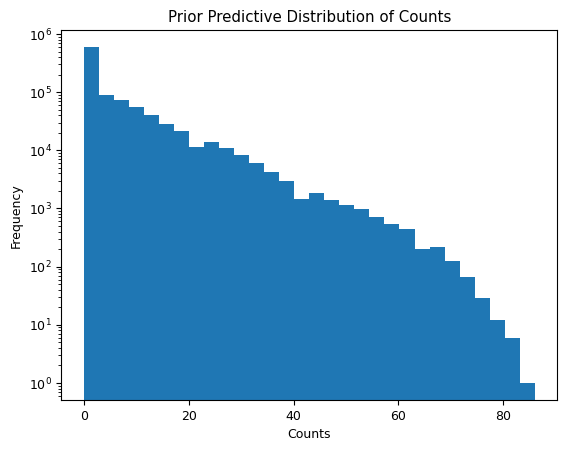

the mean is: 5.092573333333333 
the median is: 0.0, 
the 95% credible interval is (0.0, 31.0)


In [8]:
prior_pred_counts = prior.prior_predictive.counts.values.flatten()

mean_prior_pred_counts = np.mean(prior_pred_counts)
median_prior_pred_counts = np.median(prior_pred_counts)
lower_bound = np.percentile(prior_pred_counts, 2.5)
upper_bound = np.percentile(prior_pred_counts, 97.5)

plt.hist(prior_pred_counts, bins = 30, log = True)
plt.title('Prior Predictive Distribution of Counts')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.show()

print(f'the mean is: {mean_prior_pred_counts} \nthe median is: {median_prior_pred_counts}, \nthe 95% credible interval is {lower_bound, upper_bound}')

In [9]:
zeros_prior_pred = np.count_nonzero(prior_pred_counts == 0)
n_prior_pred = len(prior_pred_counts)
print('proportion of zeros in the prior predictive for counts is:', zeros_prior_pred/n_prior_pred)

proportion of zeros in the prior predictive for counts is: 0.5400912820512821


In [10]:
print('maximum number of doctor visits according to prior predictive is:', max(prior_pred_counts))

maximum number of doctor visits according to prior predictive is: 86


The shape of the prior predictive distribution is very skewed to the right due to zero prevalence; therefore, we use the log scale to visualize it. Less frequent counts of visits are more prevalent than more frequent, which is aligned with the model's assumptions.

The prior predictive results show our model's prior beliefs about the data before actually seeing the data. We can see that the median value for the counts is zero, which signifies that more than 50% of the prior distribution values are zeros. By calculating the actual proportion of the zero values, we see that the model expects approximately 56% of the data to be zero, reflecting a slight inclination towards the prevalence of zero counts. This aligns with our non-informative prior choice since the mean of the log odds parameter is set to 1. The 95% credible interval is (0.0, 31.0), which is a plausible range for the annual number of GP visits for an average human in a developed country like the UK. It reflects the model's alignment with the general logic of the system we are modeling. 

We also see the maximum limit of counts as 85, which means visiting a doctor about once every 4 days, which can be a plausible number for people who have frequent health issues and need consultation on a very regular basis. This result shows that the prior produces the values that are plausible for the nature of our data. 

Our prior predictive results provide a useful baseline, capturing the model's initial beliefs with a focus on zero prevalence. The non-informative nature of the priors reflects our limited prior knowledge, allowing the model to be influenced more by the observed data as we progress to the posterior analysis.


## Sampler Analysis

In [11]:
with model_complete_pooling:
    #sample posterior 
    trace_complete_pooling = pm.sample(4000, tune=1000)
    
    #sample posterior predictive 
    posterior = pm.sample_posterior_predictive(trace_complete_pooling)
    
    #compute log likelihood for model comparison
    pm.compute_log_likelihood(trace_complete_pooling)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, ap]


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 17 seconds.
Sampling: [counts]


### Rank Plots Analysis

The rank plot provides insight into the convergence of chains by illustrating the distribution of samples. Each vertical bar corresponds to a sample from a chain, with its height indicating the sample's rank relative to the mean of the posterior distribution. Each chain has a line denoting the expected value of the estimated parameter, serving as a reference point. Lower bars signify samples below the mean, while higher bars suggest samples above the mean. The uniformly distributed pattern of bars indicates that the sampler effectively explored all regions of the posterior distribution's parameter space equally, ensuring a well-balanced output.

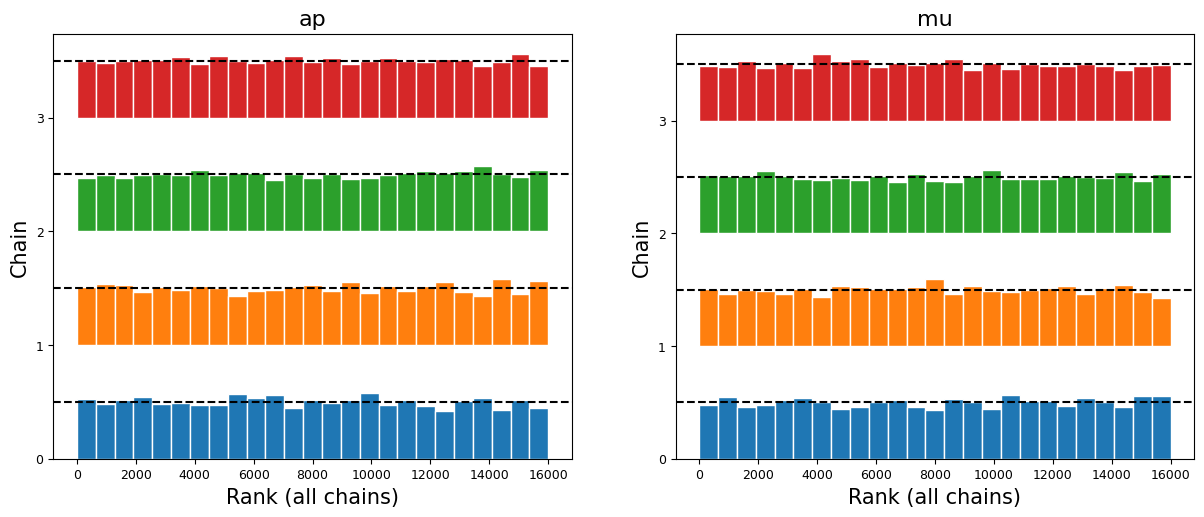

In [12]:
az.plot_rank(trace_complete_pooling, var_names=['ap','mu'])
plt.show()

### Sampler Summary Analysis

r_hat is the potential scale reduction factor. It compares the variance within each chain to the variance of the pooled chain, indicating whether the chains have converged to the same distribution. A value of r_hat close to 1 (we always aim at 1) means that the chains have likely converged. In our case, we have r_har value equal to 1 for all the parameters. Therefore, the modeling results are reliable, the chains reached a stable distribution, and the results are not biased.

Effective sample size (ESS) is a metric that shows the number of independent samples, which is important to consider given that in MCMC, samples tend to be intercorrelated. We measure it in the center of the distribution (ess_bulk) and in the tails (ess_tail). ESS should be at least 10% of the sample. I will take the smaller of the 2 ESS measurements and verify if that assumption holds for all variables.

for ap    12276/24000 = 0.51 \
for mu    11778/24000 = 0.49

All values are well above the 10% threshold, reflecting a low intercorrelation of the sample and a high number of independent samples (about half of the samples are independent). 

In [13]:
az.summary(trace_complete_pooling, var_names=['ap','mu'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ap,1.211,0.054,1.107,1.311,0.000,0.0,16869.0,11819.0,1.0
mu,10.737,0.085,10.575,10.892,0.001,0.0,16229.0,10486.0,1.0


### Trace Plot Analysis

A trace plot is the visualization of the convergence of the chains. Based on the visualizations below, we can see that the chains are well mixed and converged to the same distribution. The noize plot to the right shows the randomness of sampling, and based on it, we can say that the sampling was indeed random since no pattern was observed. 

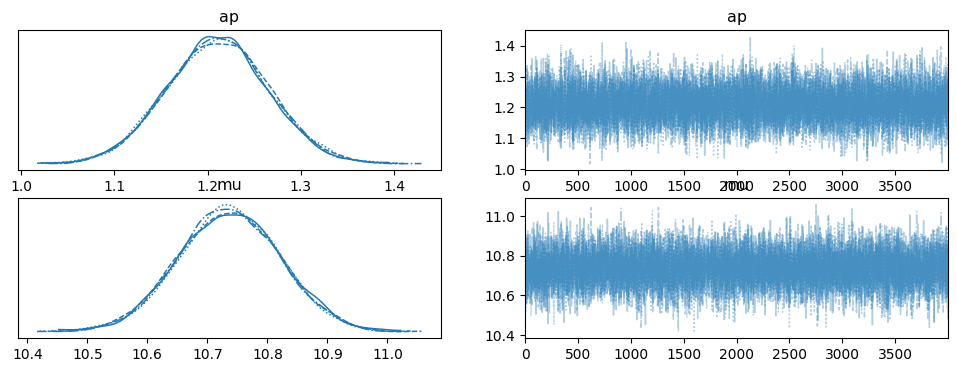

In [14]:
pm.plot_trace(trace_complete_pooling, var_names=['ap','mu'])
plt.show()

## Posterior Analysis

The plot below represents the posterior distributions of model parameters. It indicated the mean and 95% High-density interval (HDI) for each of the parameters. 

ap parameter is positive with the value 1.2, which means that the probability of observing a zero outcome is higher than a non-zero outcome. We can see the confirmation of this in the mean value of the posterior distribution of p, the probability of observing a zero, which is 77%. This is based only on the zero-inflated part of the model and does not account for the Poisson part. 

mu is the estimation of the number of counts per cell in the grid (age group and region intersection) without accounting for the zeros. It has a mean of 11 counts.

An important note to make is that neither the mu parameter represents the mean of the Poisson part of the posterior distribution. Since our model is Zero-inflated Poisson, it will not be the mean of the posterior predictive since we have a zero component incorporated. Therefore, we expect the mean of the posterior predictive data to be lower than the rate parameter of the posterior distribution due to zero inflation. Similarly, p is showing the prediction only based on the zero-inflated components of the model and not considering the counts of the events when the visit did happen. Therefore, in the posterior predictive's combined outcome, we expect the proportion of zeros to be significantly lower than 0.77. 

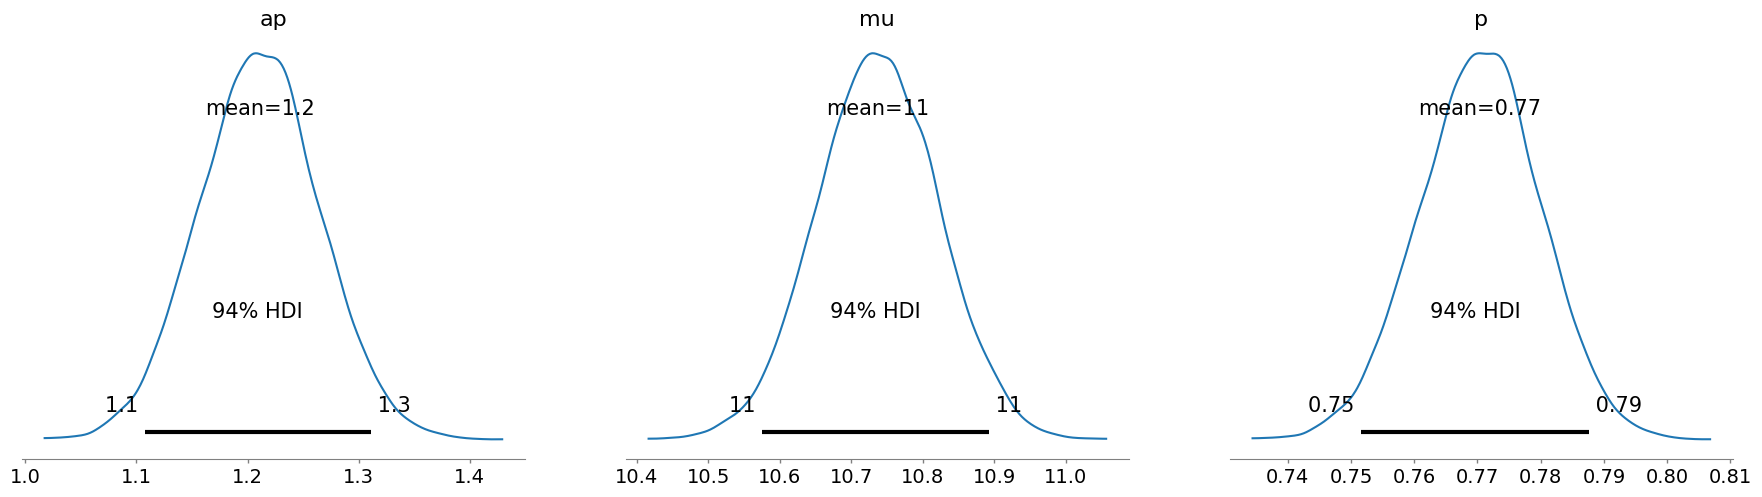

In [15]:
pm.plot_posterior(trace_complete_pooling) 
plt.show()

## Posterior Predictive Analysis

To assess the performance of the model, our next step will be comparing the data from the posterior distribution to the actual observed data. Posterior predictive helps us understand what kind of data we might expect to see in the future, given our model and the uncertainty associated with its parameters. 

I compared the mean of the data from the posterior predictive and the mean of observed data. \
Mean of observed count data: 8.2744. \
Mean of posterior predictive distribution of counts: 8.2689. \
The values are very close to each other, which indicates the model's good performance in predicting the data trend. 

I also calculated the proportion of zeros in the original data set vs generated data by the model. 
The proportion of zeros in the observed data is: 0.23; \
the proportion of zeros in the posterior predictive distribution counts is: 0.229. \
Again, the values are very close, indicating a good model performance. 

I also visualized both the distribution of zero counts (Figure 1) and non-zero counts (Figure 2). Based on those visualizations, we can see that the posterior predictive's mean matches the data's mean. 


In [16]:
post_pred_complete = posterior.posterior_predictive.counts.values.flatten()
print('Mean of observed count data:', np.round(np.mean(df['counts']), 4))
print('Mean of posterior predictive distribution of counts:', np.round(np.mean(post_pred_complete), 4))

Mean of observed count data: 8.2744
Mean of posterior predictive distribution of counts: 8.271


In [17]:
zeros_post_pred = np.count_nonzero(post_pred_complete == 0)
n_post_pred_complete = len(post_pred_complete)
zeros_data = np.count_nonzero(df['counts'] == 0)
n_data = len(df['counts'])

print('proportion of zeros in the observed data is:', round(zeros_post_pred/n_post_pred_complete, 3))
print('proportion of zeros in the posterior predictive distribution counts is:', round(zeros_data/n_data,3))

proportion of zeros in the observed data is: 0.23
proportion of zeros in the posterior predictive distribution counts is: 0.229


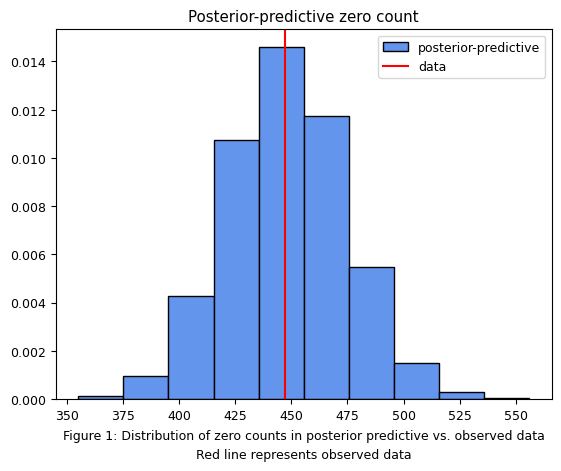

In [18]:
#code is taken from class session 8.2
zeros_posterior_dist = (posterior.posterior_predictive.counts.values == 0).sum(axis=2).flat
zeros_data = (df['counts'] == 0).sum()

plt.figure()
plt.title('Posterior-predictive zero count')
plt.hist(
    zeros_posterior_dist,
    color='cornflowerblue', edgecolor='black', density=True,
    label='posterior-predictive')
plt.axvline(zeros_data, color='red', label='data')
plt.text(0.5, -0.1, 'Figure 1: Distribution of zero counts in posterior predictive vs. observed data',
         ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.15, 'Red line represents observed data', ha='center', va='center',
         transform=plt.gca().transAxes)
plt.legend()
plt.show()

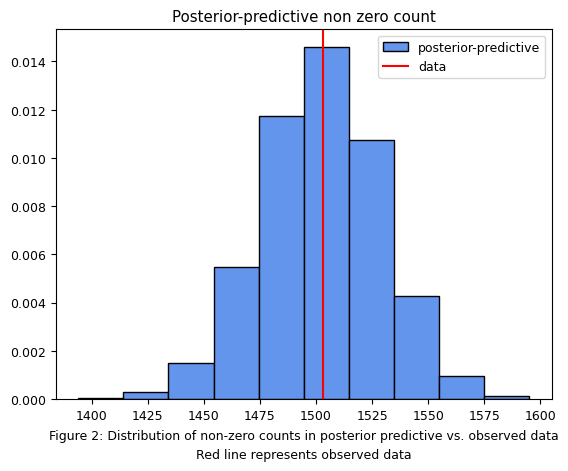

In [19]:
non_zeros_posterior_dist = (posterior.posterior_predictive.counts.values != 0).sum(axis=2).flat
non_zeros_data = (df['counts'] != 0).sum()

#code is taken from class session 8.2
plt.figure()
plt.title('Posterior-predictive non zero count')
plt.hist(
    non_zeros_posterior_dist,
    color='cornflowerblue', edgecolor='black', density=True,
    label='posterior-predictive')
plt.axvline(non_zeros_data, color='red', label='data')
plt.text(0.5, -0.1, 'Figure 2: Distribution of non-zero counts in posterior predictive vs. observed data',
         ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.15, 'Red line represents observed data', ha='center', va='center',
         transform=plt.gca().transAxes)
plt.legend()
plt.show()

## Zero-Inflated Poisson with Partial pooling

For the second model, I will use the partial pooling approach. 
The core idea of partial pooling is different from the complete pooling approach. Here, we introduce group-specific parameters, acknowledging that different combinations of region and age groups may have unique characteristics. Unlike the complete pooling model, which assumes a universal set of parameters for all groups, the partial pooling model allows for group variability. The model incorporates a hyper-parameter for the rate and group-specific hyper-parameters for both the rate and zero-inflation parameters. In this model, each group (a combination of the age group and the geographical group) is associated with its own rate parameter, allowing for a more granular understanding of group-specific behaviors. The assumption is that while there may be shared tendencies among groups, there are also distinctive features that require individualized modeling. This model is particularly useful for our case since we see the since we see that some groups deviate from the general pattern (for example more frequent visits to the doctor by the older age groups). Introducing group-specific parameters provides a flexible approach to capture the nuances present in the diverse subgroups of the dataset.

### Prior

I created claster group varaible to incroporate in the model. group variable is the array with the count of the groups, n_groups variable is the number of cells in the grid. 

The prior for the partial pooling model is based on the same assumptions as for the complete pooling model. The main difference is the introduction of hyperpriors to capture variability across groups. 

rate is defined as an exponential distribution, but its parameter is based on the hyperprior.

**rate_hyper** is a hyper-prior for the mu parameter. I added "shape=n_groups" to allow each group to have its own rate parameter, creating a hierarchical structure. The hyper-prior introduces a level of shared information across groups while allowing for individualized characteristics within each group.

same system is adopted for the ap parameter. The standard deviation is kept at 1 as for the previous model but the mean is defined with a hyperprior. 

**ap_hyper** is a is a hyper-prior for the mean of ap distribution. Again, we set the shape to be equal to the number of groups, recognizing that different groups may have distinct patterns in GP visitation rates.

**mu** (mean of the zero-inflated Poisson) is defined here as a deterministic function rather than being equal to the rate parameter. It calculates the expected mean (mu) for each observation in the dataset based on the corresponding group's rate parameter. 


\begin{align*}
\textit{Hyperprior} \\
\text{rate_hyper} & \sim \text{Exponential}(\text{lam}=0.1) \\
\text{ap_hyper} & \sim \text{Normal}(\mu=0, \sigma=1) \\
\\
\textit{Prior} \\
\text{rate} & \sim \text{Exponential}(\text{lam}=\text{rate_hyper}, \text{shape}=\text{groups}) \\
\text{ap} & \sim \text{Normal}(\mu=\text{ap_hyper}, \sigma=1, \text{shape}=\text{groups)}) \\
\text{p} & = \text{invlogit}(\text{ap}[\text{[group]}]) \\
\text{mu} & = \text{Deterministic}(\text{'mu'}, \text{rate}[\text{[group]}]) \\
\\
\textit{Likelihood (Zero-Inflated Poisson)} \\
\text{counts} & \sim \text{ZeroInflatedPoisson}(\psi = \text{p}, \mu = \text{mu}, \text{observed}=\text{df['counts']}) \\
\end{align*}

In [20]:
#code is taken from class session 9.1

# make the group cluster variable
group = np.arange(df.shape[0])
n_groups = df.shape[0]

In [21]:
with pm.Model() as model_partial_pooling:
    #hyper prior for the rate parameter
    rate_hyper = pm.Exponential('rate_hyper', lam=0.1)
    
    #group specific rate parameter based on the hyper prior 
    rate = pm.Exponential('rate', lam=rate_hyper, shape=n_groups)
    
    #hyper prior for the zero inflation parameter (logit function)
    ap_hyper = pm.Normal('ap_hyper', mu=0, sigma=1)
    
    # group specific  parameter based on hyper prior
    ap = pm.Normal('ap', mu=ap_hyper, sigma=1, shape=n_groups)
    
    #probability of non-zero counts
    p = pm.math.invlogit(ap[group])
    
    # get rate based on the corresponding group index
    mu = pm.Deterministic('mu', rate[group])
    
    # Likelihood (Zero-Inflated Poisson)
    counts = pm.ZeroInflatedPoisson('counts', psi = p, mu = mu, observed=df['counts'])


## Prior Predictive Analysis 

In [22]:
with model_partial_pooling:
    prior_partial = pm.sample_prior_predictive()

Sampling: [ap, ap_hyper, counts, rate, rate_hyper]


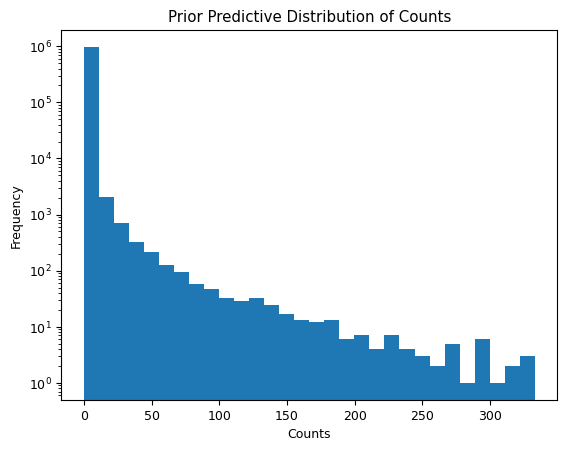

the mean is: 0.3049251282051282 
the median is: 0.0, 
the 95% credible interval is (0.0, 2.0)


In [23]:
prior_pred_counts_partial = prior_partial.prior_predictive.counts.values.flatten()

mean_pp_counts_partial = np.mean(prior_pred_counts_partial)
median_pp_counts_partial = np.median(prior_pred_counts_partial)
lower_bound = np.percentile(prior_pred_counts_partial, 2.5)
upper_bound = np.percentile(prior_pred_counts_partial, 97.5)

plt.hist(prior_pred_counts_partial, bins = 30, log = True)
plt.title('Prior Predictive Distribution of Counts')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.show()

print(f'the mean is: {mean_pp_counts_partial} \nthe median is: {median_pp_counts_partial}, \nthe 95% credible interval is {lower_bound, upper_bound}')

In [24]:
zeros_prior_pred_partial = np.count_nonzero(prior_pred_counts_partial == 0)
n_prior_pred_partial = len(prior_pred_counts_partial)
print('proportion of zeros in the prior predictive for counts is:', zeros_prior_pred_partial/n_prior_pred_partial)

proportion of zeros in the prior predictive for counts is: 0.9049066666666666


In [25]:
print('maximum number of doctor visits according to prior predictive is:', max(prior_pred_counts_partial))

maximum number of doctor visits according to prior predictive is: 333


The mean of the prior predictive distribution is approximately 0.53, with a median of 0.0. The 95% credible interval is [0.0, 2.0], which indicates a narrow range of plausible values. The distribution is heavily skewed towards zero, as we can see both based on the shape and based on 90% of zeros in the prior predictive distribution.

This model is even more biased towards zero, with a higher proportion of zeros in the prior predictive compared to the complete pooling model.  The hyper-priors make the prior predictive less informative, and since there is no observed data yet, we observe a shrinkage effect, which is typical for hierarchical models. The model pulls the group-specific parameters towards a common population-level parameter. In the absence of evidence, the model tends to shrink toward the overall trend, which, in this case, is the prevalence of zero counts. It is doing so to regularize the estimates, thus preventing extreme values.

The maximum number of doctor visits is 333, which is a much higher upper limit than the one we had for the complete pooling model. 

We can see that this prior allows for much more variability due to the presence of hyperparameters and the introduction of the group specific priors. 

## Sampler Analysis

In [26]:
with model_partial_pooling:
    # Sample from the posterior distribution
    trace_partial_pooling = pm.sample(4000, tune=2000, target_accept=0.99)

    # we will need it for model comparison
    pm.compute_log_likelihood(trace_partial_pooling)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rate_hyper, rate, ap_hyper, ap]


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 302 seconds.


### Rank Plot Analysis

In partial pooling, we have the group-based parameter distribution. We see multiple rank plots for every parameter (we have 1950 groups). rate_hyper and ap_hyper are the hyperparameters describing the overall population and are not linked to groups, so there are unique rank plots for those parameters. 
Regarding the plots, they approximate very closely a uniform distribution, which is a sign of efficient exploration of parameter space.

/Users/tetianabas/anaconda3/lib/python3.10/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (3900) in plot_rank, generating only 40 plots
  warnings.warn(


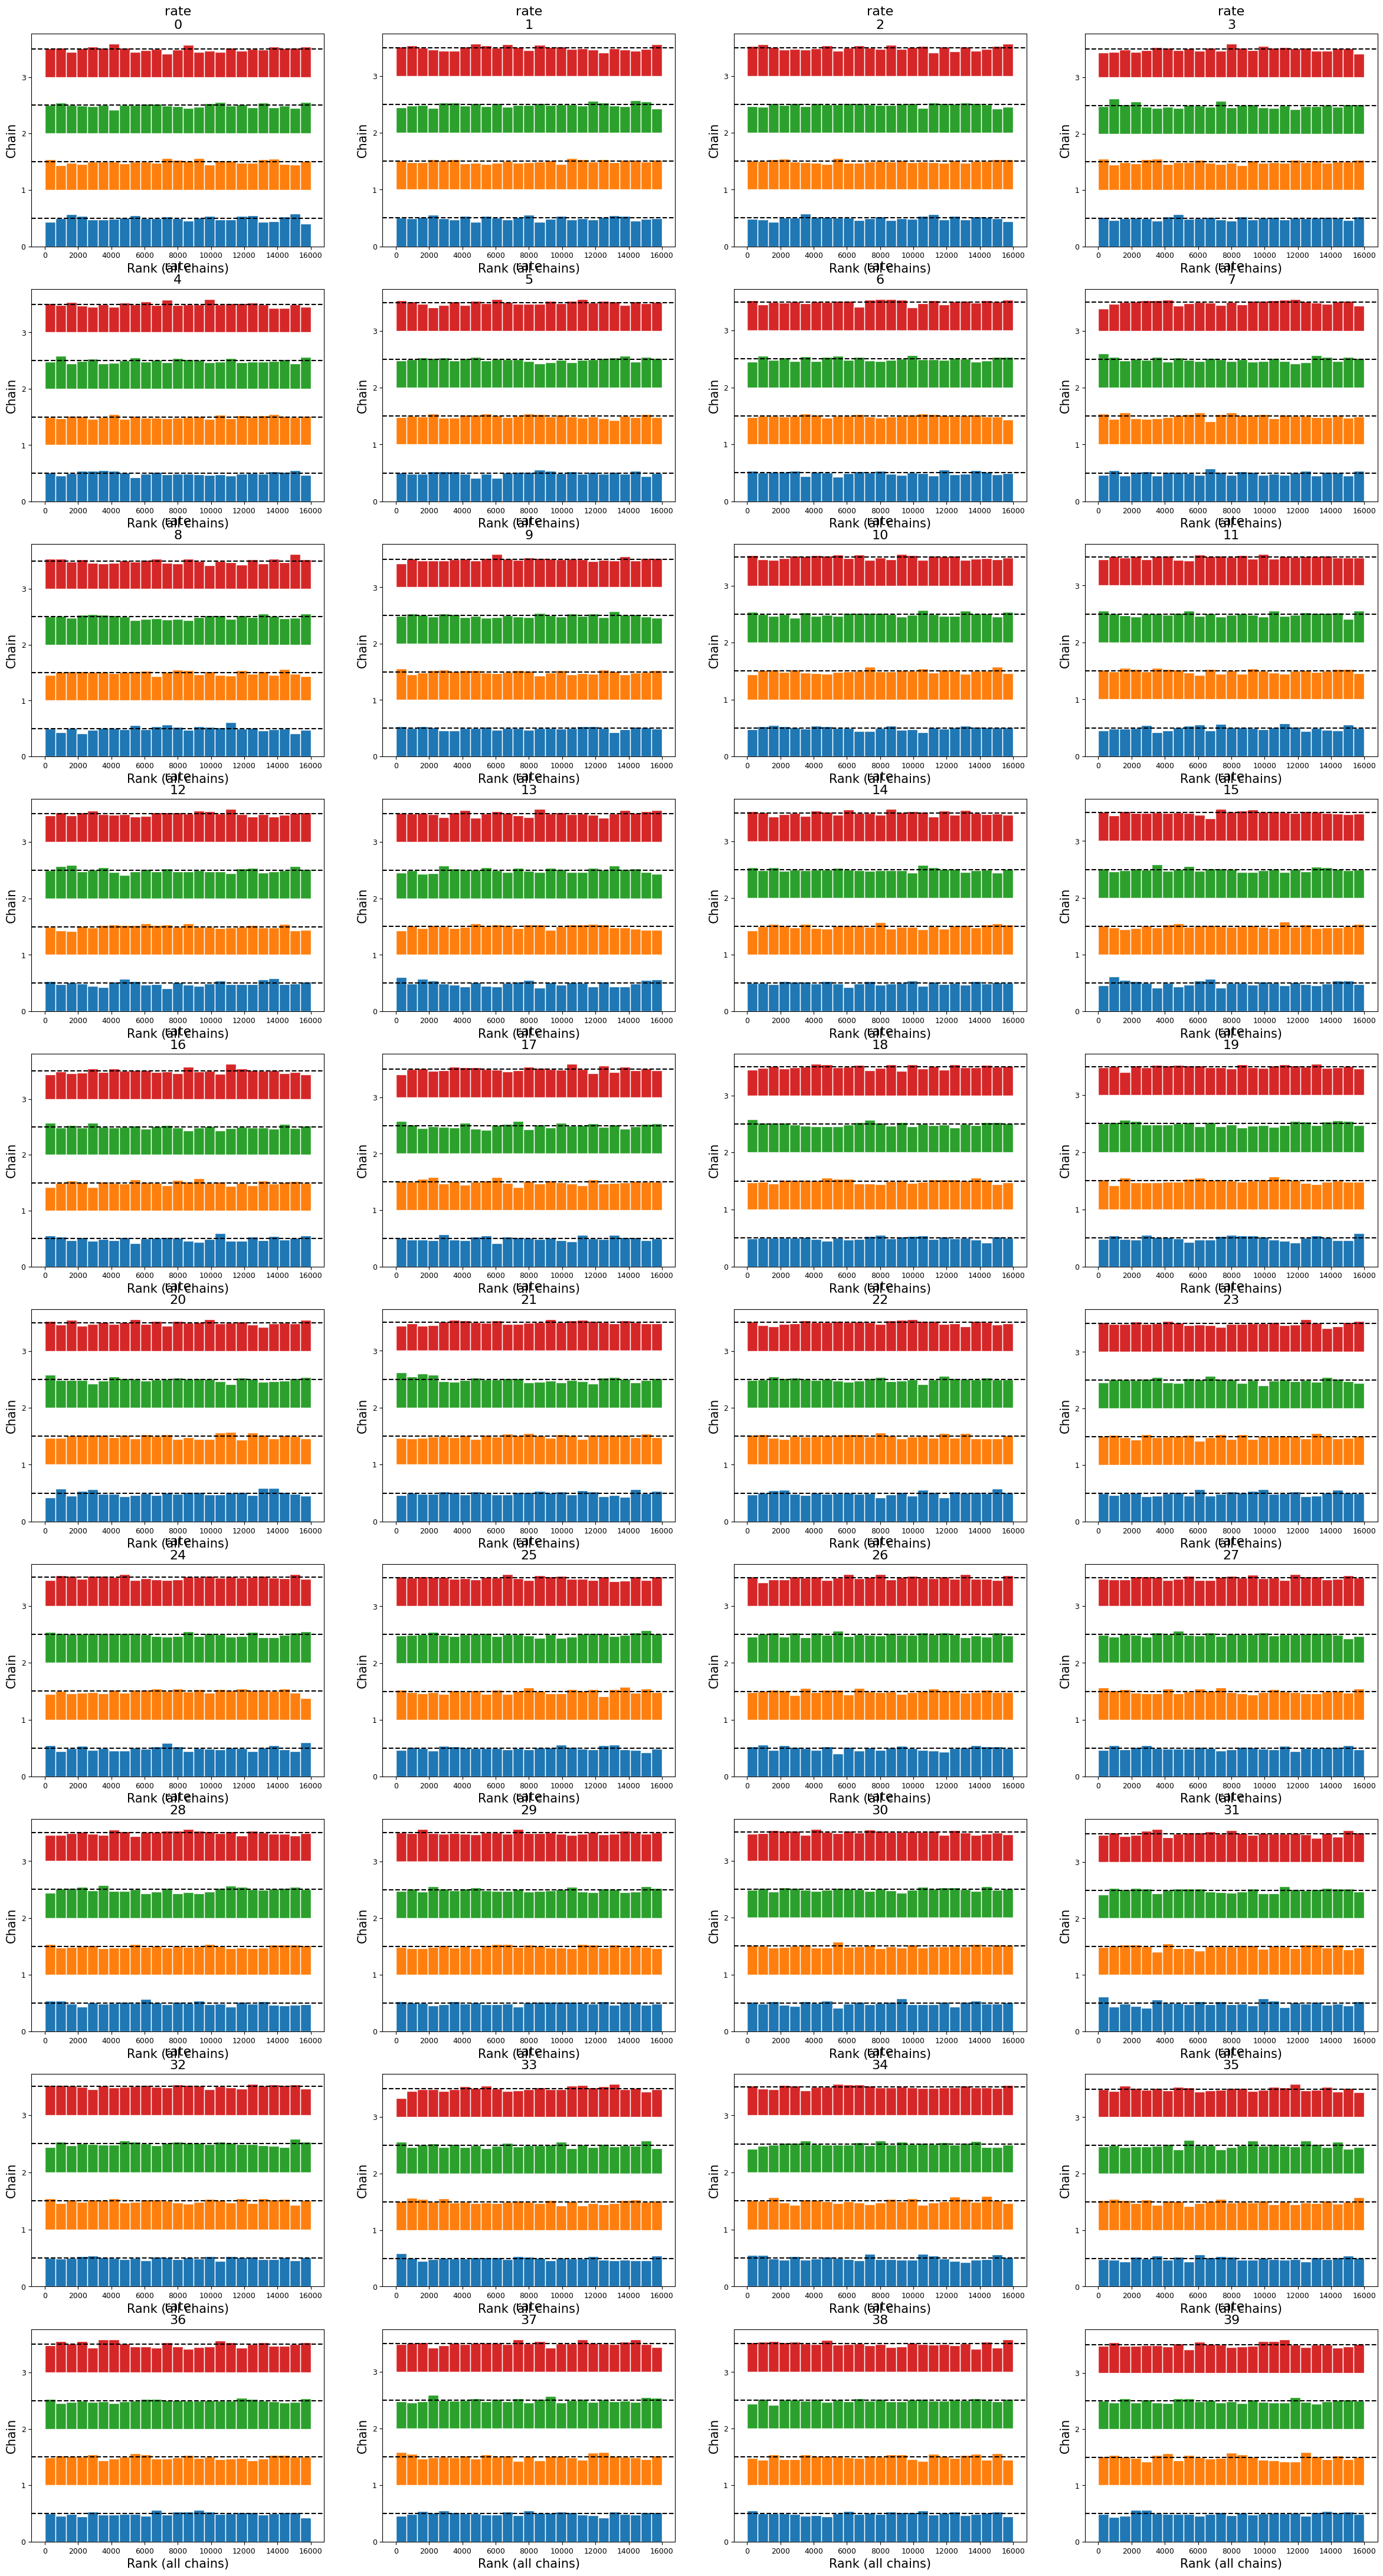

In [27]:
az.plot_rank(trace_partial_pooling.posterior, var_names=['rate','ap'])
plt.show()

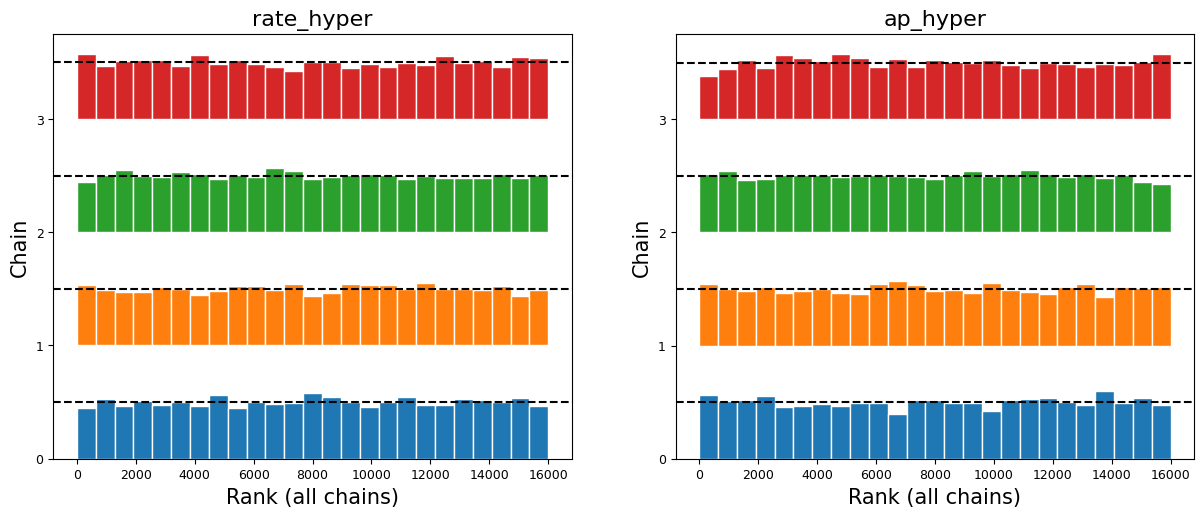

In [28]:
az.plot_rank(trace_partial_pooling.posterior, var_names=['rate_hyper','ap_hyper'])
plt.show()

### Trace summary analysis 

Similarly, as for the rank plots, we have the group-based priors that show information about each group and the hyper priors that describe the population in general. 

r_hat for all parameters is 1, which indicates good mixing, efficient exploration of the posterior parameter space, and thus reliability of the model. 

We had 24,000 samples, and as we can see from the ess bulk and ess tail data for each of the parameters, all of them are above 10,000, which is more than 10% of the required number of independent samples. This is a sign of low autocorrelation between the samples and low bias of the model. 

In [29]:
az.summary(trace_partial_pooling.posterior, var_names=['ap','rate', 'rate_hyper','ap_hyper'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ap[0],2.166,0.963,0.394,3.997,0.006,0.005,27167.0,11024.0,1.0
ap[1],2.165,0.964,0.391,4.037,0.006,0.005,25308.0,11335.0,1.0
ap[2],2.163,0.961,0.318,3.938,0.006,0.005,27306.0,12005.0,1.0
ap[3],2.163,0.960,0.423,4.009,0.006,0.005,29752.0,11829.0,1.0
ap[4],2.164,0.945,0.486,4.034,0.006,0.005,28296.0,10987.0,1.0
...,...,...,...,...,...,...,...,...,...
rate[1947],18.164,4.014,11.073,26.077,0.024,0.018,27545.0,11109.0,1.0
rate[1948],13.601,3.555,7.168,20.142,0.021,0.016,28089.0,10137.0,1.0
rate[1949],18.127,4.083,10.499,25.581,0.024,0.018,27758.0,10883.0,1.0
rate_hyper,0.103,0.003,0.098,0.108,0.000,0.000,14345.0,12376.0,1.0


## Posterior Visualization

The plot below shows the visualization of the posterior distribution. 
The posterior of ap is 1.2. When log odds has a positive value, it indicates an increased likelihood of observing zero counts. Based on the zero-inflated part of the model, we would expect a zero in 77% of cases. Based on the Poisson part of the model, the expected value of the number of visits to GP will be 11. The posterior predictive will combine those 2 parameter values and show the result using with the zero-inflated model. 

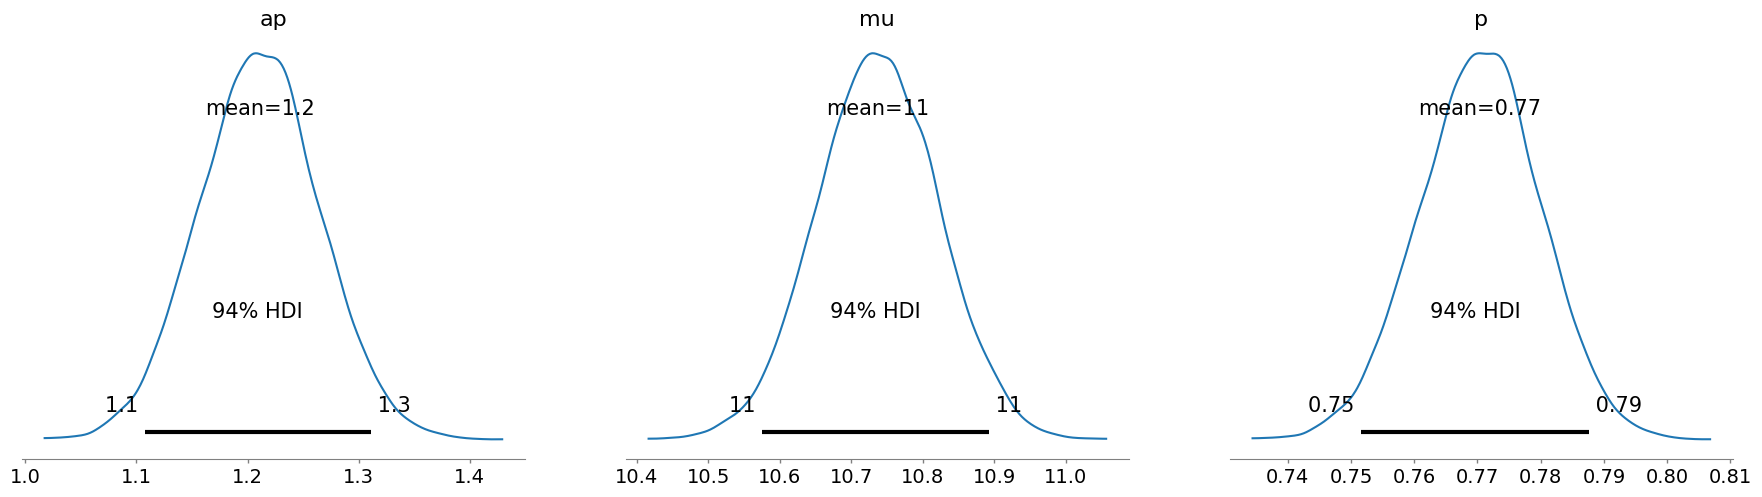

In [30]:
pm.plot_posterior(trace_complete_pooling) 
plt.show()

## Posterior Predictive Analysis

I analyzed the posterior predictive based on its performance in generating data that will be aligned with the observed data. 

Mean of observed count data: 8.2744 \
Mean of posterior predictive distribution of counts: 8.2638 

the proportion of zeros in the observed data is: 0.23 \
the proportion of zeros in the posterior predictive distribution counts is: 0.229 

I also visualized both the distribution of zero counts (Figure 3) and non-zero counts (Figure 4). Based on those visualizations, we can see that the posterior predictive's mean matches the data's mean. 

Based on this analysis, we can see that the posterior predictive of the partial pooling is very close to the real data, which indicates a good performance of the model. 

In [31]:
with model_partial_pooling:
    posterior_partial = pm.sample_posterior_predictive(trace_partial_pooling)

Sampling: [counts]


In [32]:
post_pred_partial = posterior_partial.posterior_predictive.counts.values.flatten()
mean_partial = np.mean(post_pred_partial)

In [33]:
print('Mean of observed count data:', np.round(np.mean(df['counts']), 4))
print('Mean of posterior predictive distribution of counts:', np.round(mean_partial, 4))

Mean of observed count data: 8.2744
Mean of posterior predictive distribution of counts: 8.2659


In [34]:
zeros_post_pred2 = np.count_nonzero(post_pred_partial == 0)
n_post_pred_complete2 = len(post_pred_partial)
zeros_data = np.count_nonzero(df['counts'] == 0)
n_data = len(df['counts'])

print('proportion of zeros in the observed data is:', round(zeros_post_pred2/n_post_pred_complete2, 3))
print('proportion of zeros in the posterior predictive distribution counts is:', round(zeros_data/n_data,3))

proportion of zeros in the observed data is: 0.23
proportion of zeros in the posterior predictive distribution counts is: 0.229


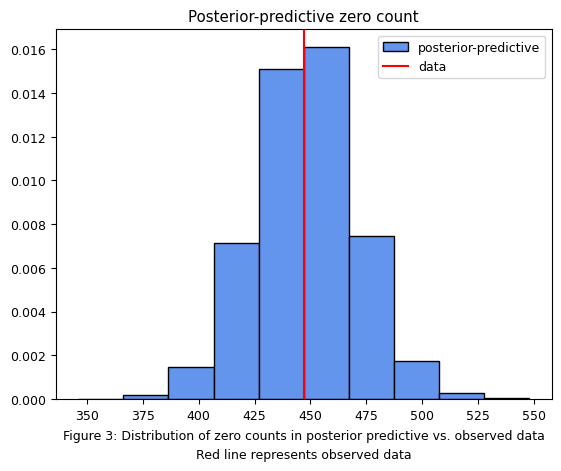

In [35]:
#code is taken from class session 8.2
zeros_posterior_dist2 = (posterior_partial.posterior_predictive.counts.values == 0).sum(axis=2).flat
zeros_data = (df['counts'] == 0).sum()

plt.figure()
plt.title('Posterior-predictive zero count')
plt.hist(
    zeros_posterior_dist2,
    color='cornflowerblue', edgecolor='black', density=True,
    label='posterior-predictive')
plt.axvline(zeros_data, color='red', label='data')
plt.text(0.5, -0.1, 'Figure 3: Distribution of zero counts in posterior predictive vs. observed data',
         ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.15, 'Red line represents observed data', ha='center', va='center',
         transform=plt.gca().transAxes)
plt.legend()
plt.show()

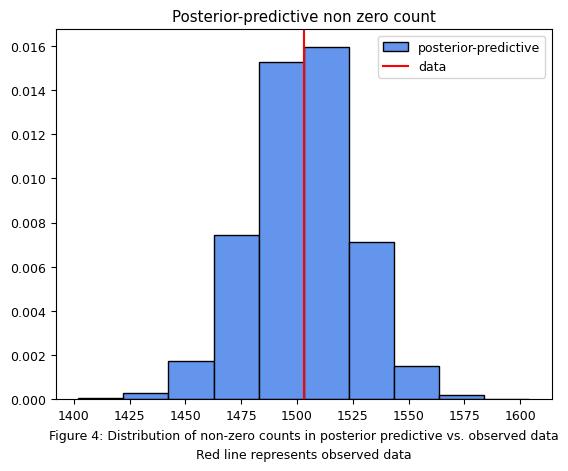

In [36]:
non_zeros_posterior_dist2 = (posterior_partial.posterior_predictive.counts.values != 0).sum(axis=2).flat
non_zeros_data = (df['counts'] != 0).sum()

#code is taken from class session 8.2
plt.figure()
plt.title('Posterior-predictive non zero count')
plt.hist(
    non_zeros_posterior_dist2,
    color='cornflowerblue', edgecolor='black', density=True,
    label='posterior-predictive')
plt.axvline(non_zeros_data, color='red', label='data')
plt.text(0.5, -0.1, 'Figure 4: Distribution of non-zero counts in posterior predictive vs. observed data',
         ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.15, 'Red line represents observed data', ha='center', va='center',
         transform=plt.gca().transAxes)
plt.legend()
plt.show()

## Model Comparison  

The mean of the data frame is approximately 8.27, and both the complete pooling and partial pooling models produce posterior means close to this value. The mean of the posterior distribution in the complete pooling model is 8.27, while the mean of the posterior distribution in the partial pooling model is slightly lower at 8.26. These differences are relatively small and indicate that both models provide similar estimates for the average number of GP visits per person.

The proportions of zeros in both models are also quite close, with the complete pooling model having a proportion of zeros at 0.2299, and the partial pooling model at 0.2295. Both proportions are very similar to the overall proportion of zeros in the data, which is 0.2292. This suggests that both models are consistent with the observed pattern of zeros in the data.

Mean and proportion of zeros focus on summary statistics that may not capture the entire distribution of the data. Examining the full posterior distribution can provide a more comprehensive view.

In [37]:
#get the values of the posterior predictive 
posterior_complete_flatten = posterior.posterior_predictive.counts.values.flatten()
posterior_partial_flatten = posterior_partial.posterior_predictive.counts.values.flatten()

In [38]:
print('Mean of data frame:', np.mean(df['counts']))
print('Mean of posterior distribution complete pooling:', np.mean(posterior_complete_flatten))
print('Mean of posterior distribution partial pooling:', np.mean(posterior_partial_flatten))

Mean of data frame: 8.274358974358975
Mean of posterior distribution complete pooling: 8.270993365384616
Mean of posterior distribution partial pooling: 8.265905961538461


In [39]:
zeros_post_pred_complete = np.count_nonzero(posterior_complete_flatten == 0)
n1 = len(posterior_complete_flatten)
zeros_post_pred2 = np.count_nonzero(posterior_partial_flatten == 0)
n_post_pred_complete2 = len(posterior_partial_flatten)
zeros_data = np.count_nonzero(df['counts'] == 0)
n3 = len(df['counts'])

print('proportion of zeros in complete model is:', zeros_post_pred_complete/n1)
print('proportion of zeros in partial model is:', zeros_post_pred2/n_post_pred_complete2)
print('proportion of zeros in data is:', zeros_data/n3)

proportion of zeros in complete model is: 0.22969076923076923
proportion of zeros in partial model is: 0.22956044871794873
proportion of zeros in data is: 0.22923076923076924


Based on the visualization of the posterior predicitve distributions we can see that the partial pooling model has a greater data variability. 

The higher variability in the partial pooling model compared to the complete pooling model is due to the incorporation of group-specific parameters in the former. In the partial pooling model, each age group has its own specific rate parameter and zero-inflation parameter, introducing more flexibility and adaptability to the individual characteristics of each age group. This increased variability reflects the model's ability to capture age group-specific patterns, allowing for a more nuanced representation of the underlying data.

Regarding the maximum values, the complete pooling model has a maximum value of 32, while the partial pooling model has a maximum value of 164. The higher maximum value in the partial pooling model suggests that the model is better able to accommodate extreme values and outliers within each age group. This can be advantageous when dealing with diverse and potentially heterogeneous age groups, as the model can better capture the variability present in each subgroup.

The maximum value of the complete pooling model is 33
The maximum value of the partial pooling model is 162


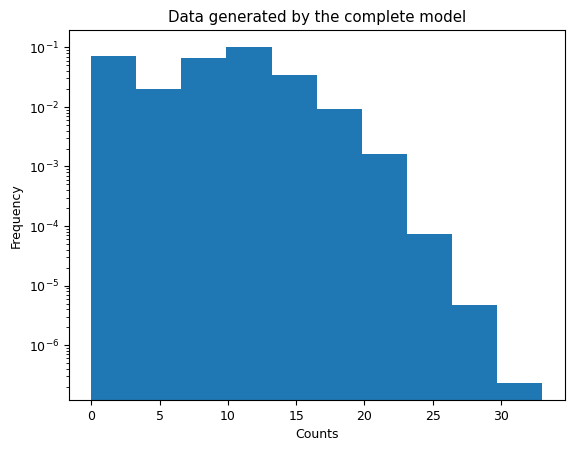

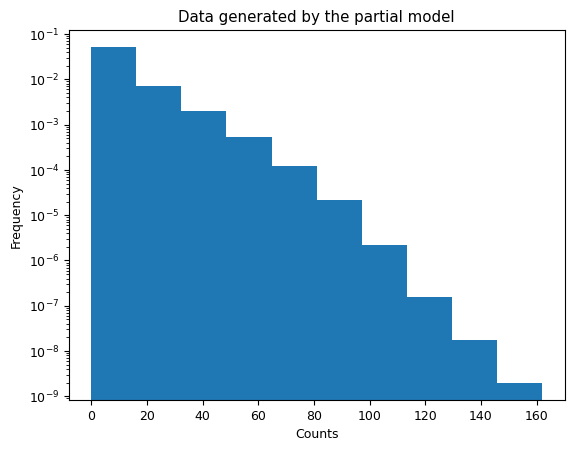

In [40]:
plt.hist(post_pred_complete, density = True, log = True)
plt.title('Data generated by the complete model')
plt.xlabel('Counts')
plt.ylabel('Frequency')

plt.figure()
plt.hist(post_pred_partial, density = True, log = True)
plt.title('Data generated by the partial model')
plt.xlabel('Counts')
plt.ylabel('Frequency')

m1 = max(post_pred_complete)
m2 = max(post_pred_partial)

print(f'The maximum value of the complete pooling model is {m1}')
print(f'The maximum value of the partial pooling model is {m2}')

Now we compare the performance of the complete pooling model as well as the partial pooling model by doing a visual comparison.I will take 2 approaches here for better comparison. 

For the first approach, I will plug in the mean values of posterior predictive distributions. The mean is a measure of centrality and represents the average or expected value of the distribution. It provides a single, representative value that summarizes the central tendency of the distribution. Using the mean ensures consistency across imputations. If the imputation process is repeated with the same data and model, the mean will remain constant, providing stability in results. However as we saw previously, the means are pretty close so it will be hard to see the difference visually.Still, we will see the general performance of both models.  

For the second approach I will identify the coordinates of the missing values, generate random samples from both posterior predictive distributions and fill in each of the missing values with the random sample from the posterior predictive distribution. By sampling from the posterior predictive distribution, I incorporate the variability into the imputed values, giving a more realistic representation of the potential range of missing values. It also captures the uncertainty. Additionally, it helps avoid imputation bias when we plug in the mean values. 


In [41]:
#Approach 1

#get the mean values from the posterior predictive 
complete_mean = np.mean(posterior_complete_flatten)
partial_mean = np.mean(posterior_partial_flatten)

#copy the original data
raw_data_filled3 = np.copy(raw_data)
raw_data_filled4 = np.copy(raw_data)

#fill in the missing vlues with the mean 
raw_data_filled3[np.isnan(raw_data_filled3)] = complete_mean
raw_data_filled4[np.isnan(raw_data_filled4)] = complete_mean

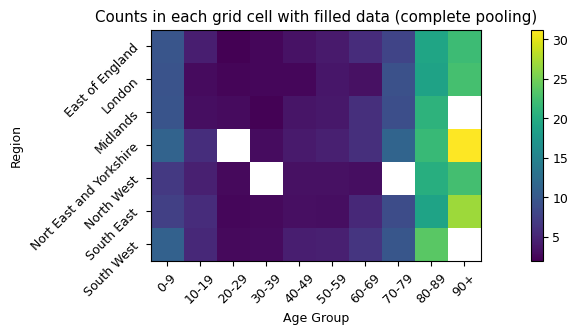

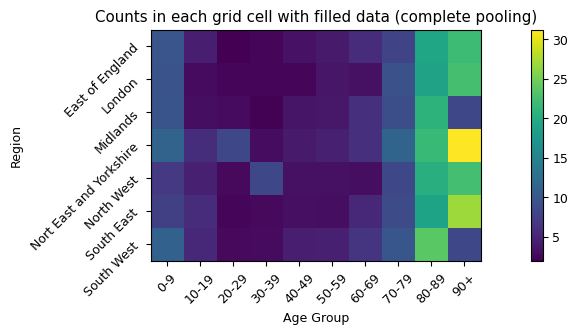

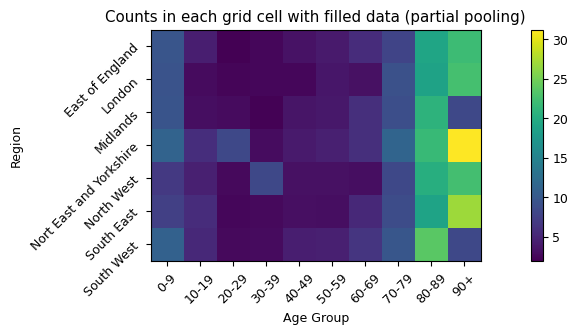

In [42]:
plt.figure(figsize=(13, 3))
plt.title('Counts in each grid cell with filled data (complete pooling)')
plt.xlabel('Age Group')
plt.ylabel('Region')
plt.imshow(raw_data.mean(axis=2), cmap='viridis') 
plt.colorbar()
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()


#fill in the blanks with the mean of the complete pooling posterior predictive distribution 
plt.figure(figsize=(13, 3))
plt.title('Counts in each grid cell with filled data (complete pooling)')
plt.xlabel('Age Group')
plt.ylabel('Region')
plt.imshow(raw_data_filled3.mean(axis=2), cmap='viridis') 
plt.colorbar()
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()

#fill in the blanks with the mean of the partial pooling posterior predictive distribution 
plt.figure(figsize=(13, 3))
plt.title('Counts in each grid cell with filled data (partial pooling)')
plt.xlabel('Age Group')
plt.ylabel('Region')
plt.imshow(raw_data_filled3.mean(axis=2), cmap='viridis') 
plt.colorbar()
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()

As we can see on the visualizations above, both models mean result in very similar visualizations. Both models blend pretty well in the dataset. We see that the values for the older age groups are still underestimated since this group is the outlier for the general population. 

In [43]:
#Approach 2
np.random.seed(420)

#get missing indexes 
missing_indices = []
for region, region_data in enumerate(raw_data):
    for age_category, age_data in enumerate(region_data):
        for count_index, count in enumerate(age_data):
            # Check for missing values
            if np.isnan(count):
                # Store the index of the missing count
                missing_indices.append((region, age_category, count_index))

                
#copy the original data
raw_data_filled1 = np.copy(raw_data)
raw_data_filled2 = np.copy(raw_data)


#geneate random samples of the size of the number of missing vlaues
random_samples_complete = np.random.choice(posterior_complete_flatten,size = nan_values)
random_samples_partial = np.random.choice(posterior_partial_flatten,size = nan_values)


#plug in the values                
for region, age_category, count_index in missing_indices:
    raw_data_filled1[region][age_category][count_index] = np.random.choice(random_samples_complete)
    raw_data_filled2[region][age_category][count_index] = np.random.choice(random_samples_partial)
    

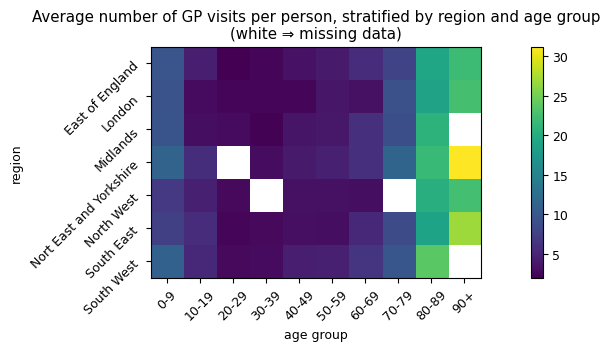

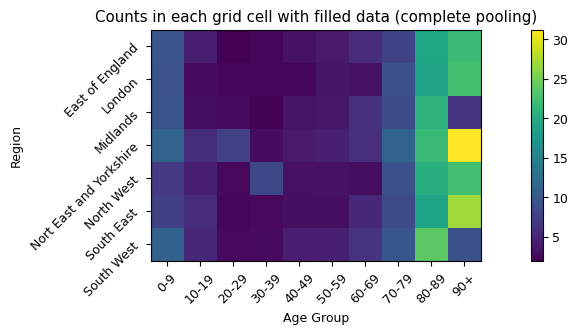

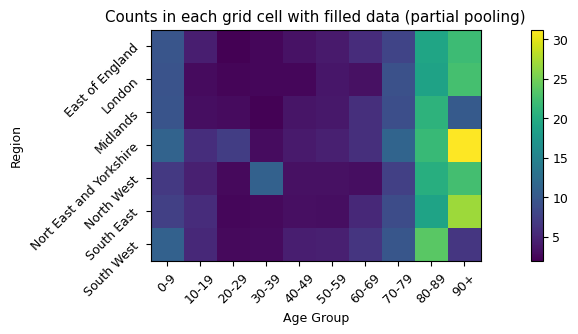

In [44]:
plt.figure(figsize=(13, 3))
plt.title('Average number of GP visits per person, stratified by region and age group\n(white ⇒ missing data)')
plt.xlabel('age group')
plt.ylabel('region')
plt.imshow(raw_data.mean(axis=2))
plt.colorbar(fraction=0.032)
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()

#fill in the blanks with the random sample from the complete pooling posterior predictive distribution 
plt.figure(figsize=(13, 3))
plt.title('Counts in each grid cell with filled data (complete pooling)')
plt.xlabel('Age Group')
plt.ylabel('Region')
plt.imshow(raw_data_filled1.mean(axis=2), cmap='viridis') 
plt.colorbar()
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()

#fill in the blanks with the  random sample from the partial pooling posterior predictive distribution 
plt.figure(figsize=(13, 3))
plt.title('Counts in each grid cell with filled data (partial pooling)')
plt.xlabel('Age Group')
plt.ylabel('Region')
plt.imshow(raw_data_filled2.mean(axis=2), cmap='viridis') 
plt.colorbar()
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()

This visualization shows different results for the models. This showcases the greater variability of the partial pooling model, which we have seen earlier. 

### Leave-One-Out Cross-Validation Comparison

Both models are good at matching the mean of the observed data. This similarity makes it challenging to assess the relative performance of the models critically. Also, a good match with the observed mean can also be the result of overfitting. To understand how good the models are in comparison with each other, I will use PSIS leave-one-out cross-validation.

PSIS leave-one-out cross-validation serves as a method to assess the models' out-of-sample accuracy. When constructing a model, the primary objective is often to use it for predicting future data, emphasizing extrapolation accuracy over interpolation accuracy.

Cross-validation evaluates the model's predictive accuracy on a different sample by dividing it into multiple "folds" and predicting each fold based on the others. If employing the maximum number of folds, one unique observation is left out in each iteration, constituting leave-one-out cross-validation (LOO CV).

Leave-One-Out Cross-Validation estimates the Logarithm Pointwise Predictive Density (LPPD) by iteratively removing one data point and calculating the probability density of that isolated data point using the model's predictions from the remaining data. This process results in the Pointwise Predictive Density (PPD), whose values are summed after taking the logarithm. LPPD accounts for the model's uncertainty by integrating across all possible parameter values, offering a comprehensive assessment of the model's predictive performance considering parameter uncertainty.

PSIS, or Pareto-smoothed Importance Sampling, takes into account that not all observations carry equal importance. A relatively unexpected observation holds more significance than one that is relatively expected. PSIS employs the Pareto distribution to model the weights of individual data points' importance. The smoothing aspect of PSIS stabilizes these weights, enhancing their reliability and robustness.

/Users/tetianabas/anaconda3/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
partial_pooling,0,-5378.16583,1428.875608,0.00000,1.000000e+00,40.121173,0.000000,True,log
complete_pooling,1,-10967.98449,13.263462,5589.81866,1.376677e-14,334.488113,312.745039,False,log


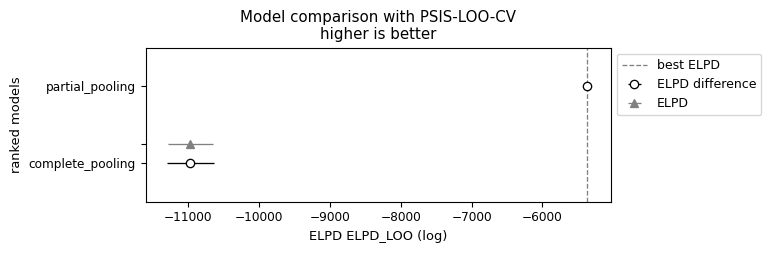

In [45]:
#code is taken from class session 7.1 (model comparison workbook 3)

inferences = {'complete_pooling':trace_complete_pooling, 'partial_pooling':trace_partial_pooling}
df2 = az.compare(inferences, ic='loo')
display(df2)
az.plot_compare(df2)
plt.title('Model comparison with PSIS-LOO-CV\nhigher is better')
plt.xlabel('ELPD ' + df2.columns[1].upper() + ' (log)')
plt.legend(['best ELPD', 'ELPD difference', 'ELPD'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

### Analysis of PSIS LOO CV

The figure above demonstrates the results for the 2 models that we created. We use PSIS LOO CV to see how the model fits the "new" data points and compute ELPD (average of individual LPPD) on those data points. The x-axis represents the ELPD values. The y-axis represents the ranking of the model. The model with the lowest ELPD is ranked 1, and others are ranked accordingly. A lower rank (higher position on the graph) indicates a better-performing model.

The vertical dashed line shows us how the best model performs relative to other models. Empty dots show the ELPD value for each model. The analysis results show that the partial pooling had better predictive accuracy. Despite having aligned credible means of the posterior predictive distribution values, the predictive accuracy differs. ELPD difference between the models 5583, ELPD for the partial pooling model is -5583 and ELPD for the complate pooling is -10967. Therefore the partial pooling has about 2 times higher predictive accuracy. 

Better predictive accuracy of the partial pooling moder could be attributed to its ability to account for individual group-specific variations, allowing it to capture the nuances and heterogeneity present in the data. The complete pooling model, on the other hand, assumes a uniform parameter for all groups, which may lead to underestimating the variability within each group.

## Conclusion

We should prefer the partial pooling model. 
1) it has greater variability. It is indicative of its ability to capture and accommodate the distinct characteristics within each group. In contrast, the complete pooling model, by assuming uniform parameters across all groups, may overlook the inherent variability present in individual groups. The greater variability in the partial pooling model allows for a more nuanced and flexible representation of the underlying patterns in the data. 
2) It has a higher ELPD and therefore a better predictive accuracy. This improvement in predictive accuracy suggests that the partial pooling model's flexibility in adapting to the unique characteristics of each group leads to more accurate and reliable predictions compared to the rigid assumptions of the complete pooling model.

## AI statement 

I used Grammarly to fix grammar mistakes. I used GPT to ask questions about the concepts I was confused about. 

## Optional stretch goal

We can do better than the two models above. Investigate the shortcomings of the hierarchical model above and improve it further. Show your work and motivate for better models. Use model comparison to show which model is the best and by how much. Present the posterior distributions and predictions for the missing data using your best model.

If you do a great job on this part, you could get an extra score of ⑤ on the #ModelDebugging LO. A great job means you have to describe the model, make sure the sampler works well, and visualize and explain/interpret all important outputs from the model. This is a tough problem and it is possible that nobody will get it right.